# Materials Data Classification

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import andrews_curves, parallel_coordinates
## sklearn imports
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,MaxAbsScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

### Matplotlib and styling
%matplotlib inline
plt.style.use('ggplot')
# Define plot's default figure size
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)

In [2]:
df = pd.read_table('Data_H2.tsv')

In [3]:
df.tail()

,structure,Energy,Henry,Void,density,PoreD,SA_vol,SA_grav,Neural3,category
470607,ZIF-Im-h8122482,-4.174691,4.620000e-07,0.20,1.060387,8.42922,2480.29,2630.07,21.5,ZIF
470608,ZIF-Im-h8176334,-4.335161,4.030000e-07,0.18,1.030293,8.05943,2687.31,2768.71,20.5,ZIF
470609,ZIF-Im-h8115831,-4.226241,4.120000e-07,0.18,1.052241,9.17715,2667.28,2806.62,20.3,ZIF
470610,ZIF-Im-h8255252,-4.368418,3.990000e-07,0.18,1.032022,7.59298,2732.93,2820.44,20.1,ZIF
470611,ZIF-Im-h8153569,-4.306060,3.780000e-07,0.17,1.027555,8.47116,2604.83,2676.61,19.4,ZIF


In [21]:
df.columns

Index(['structure', 'Energy', 'Henry', 'Void', 'density', 'PoreD', 'SA_vol',
       'SA_grav', 'Neural3', 'category'],
      dtype='object')

In [4]:
df = df.drop('structure',axis=1)

# Plot: Parallel Coordinate

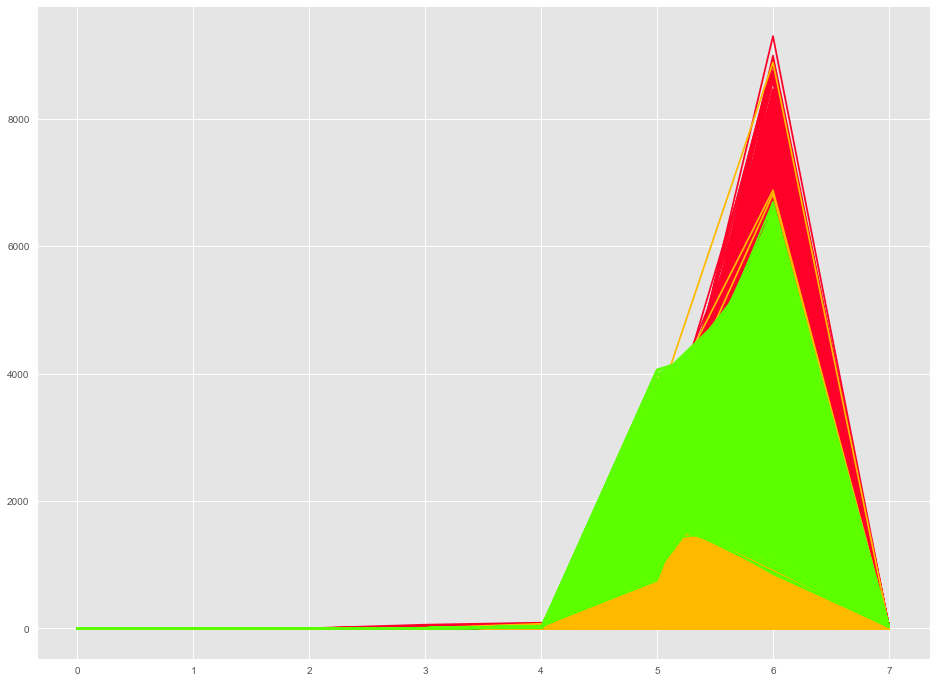

In [17]:
 parallel_coordinates(df, 'category', colormap='gist_rainbow')

# Scatter Plot: Features

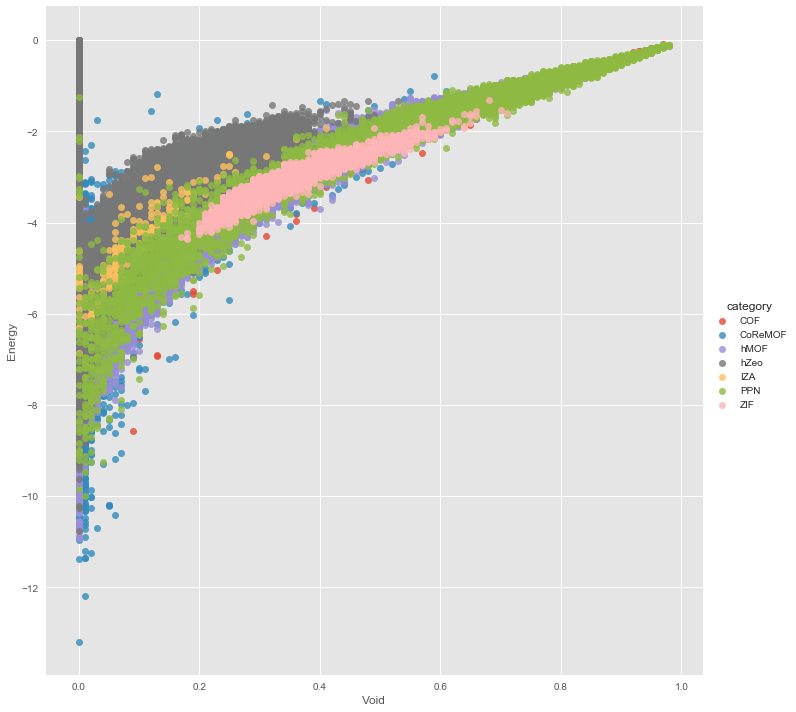

In [7]:
sns.lmplot(x='Void', y='Energy' , 
           hue='category',data=df, size=10,legend=True,fit_reg=False)

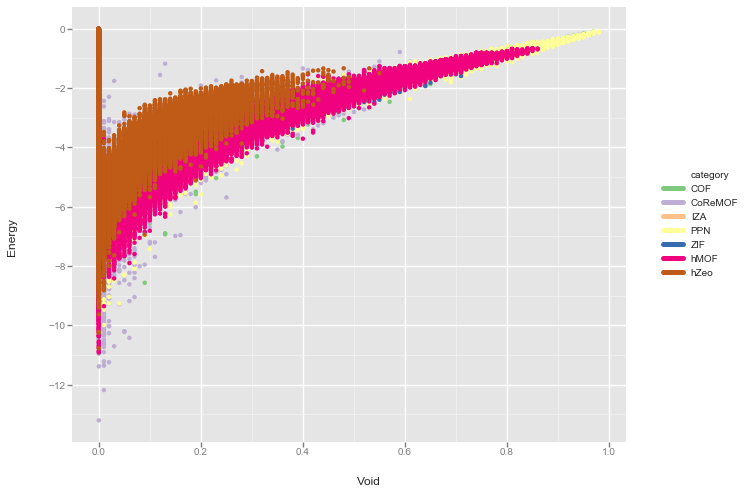

<ggplot: (302054727)>

In [73]:
from ggplot import *
ggplot(aes(x='Void', y='Energy', color='category'), data=df) +\
    geom_point() +\
    scale_color_brewer(type='qual')

In [14]:
df = df.fillna(0.0)

In [72]:
X = pd.DataFrame(df.drop(['category'], axis=1))
X.columns = df.drop(['category'], axis=1).columns
y = df['category']
X.head()

,Energy,Henry,Void,density,PoreD,SA_vol,SA_grav,Neural3
0,-1.854125,0.000002,0.56,3.282197,9.82334,2374.36,7793.11,39.2
1,-1.947247,0.000001,0.54,2.952239,9.25041,2442.82,7211.78,39.2
2,-1.864102,0.000001,0.55,2.640327,10.34738,2419.72,6388.86,39.2
3,-2.203332,0.000001,0.52,2.791378,11.91255,2585.66,7217.54,39.1
4,-1.982168,0.000002,0.54,3.389038,12.84695,2545.69,8627.43,39.0


# Dimension Reduction: PCA

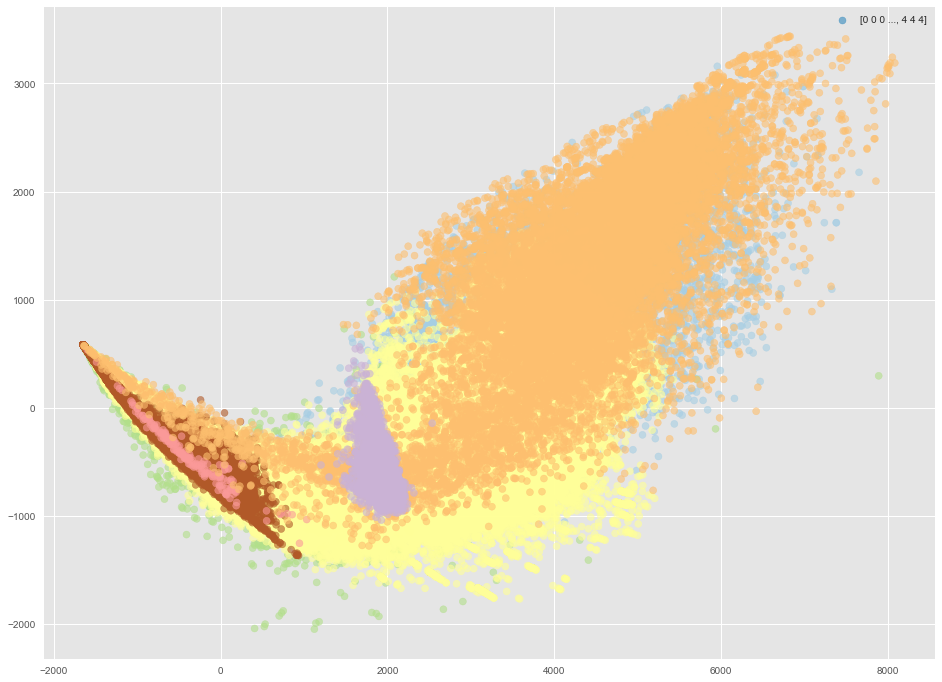

In [74]:
from sklearn.decomposition import PCA
pca_dr = PCA(n_components=2,copy=True, svd_solver='arpack')
Xp = pca_dr.fit_transform(X)
plt.scatter(Xp[:, 0], Xp[:, 1], c=yl,label=ct,cmap=plt.cm.Paired,alpha=0.6)
plt.legend()

# PCA: Plot with Labels

In [75]:
df_pca = pd.DataFrame({'x':Xp[:, 0],'y':Xp[:, 1],'cat':y})
df_pca.head()

,cat,x,y
0,COF,6486.531742,977.040647
1,COF,5962.417373,716.409562
2,COF,5179.995637,460.439445
3,COF,6016.047748,583.901671
4,COF,7329.714465,1097.336682


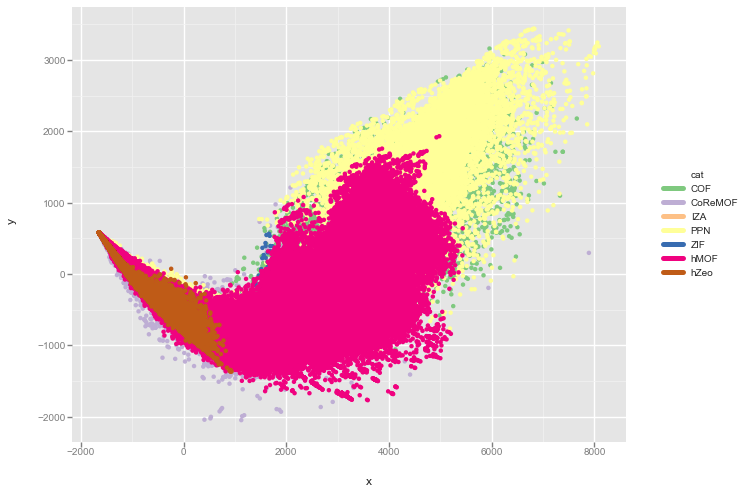

<ggplot: (306287757)>

In [76]:
from ggplot import *
ggplot(aes(x='x', y='y', color='cat'), data=df_pca) +\
    geom_point() +\
    scale_color_brewer(type='qual')

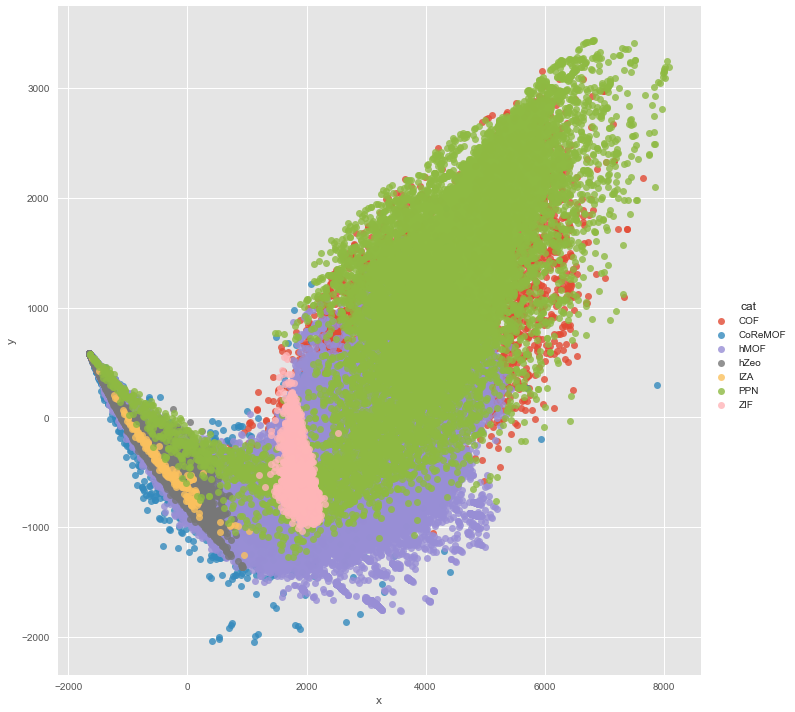

In [77]:
sns.lmplot(x='x', y='y' , 
           hue='cat',data=df_pca, size=10,legend=True,fit_reg=False)